# Projeto 1

Aluno: Alexandre Zamberlan Filho

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import matplotlib.pyplot as plt

# Introdução

Para este projeto foi estabelecida a seguinte pergunta:

Como a mídia influência no estado de felicidade dos habitantes de uma população? O bombardeio de notícias negativas impacta o bem estar da população?

Para responder a pergunta foram então recolhidas 3 variáveis: 

"IDH","Taxa de Suicídio por 100.000 habitantes" e "Assinantes de internet"

Sendo taxa de suicídio representante da felicidade/infelicidade da população, assinantes de internet condizente ao número de consumidores de mídia e IDH a representação da população.

# Análises e explicação dos resultados

## Leitura dos dados:

In [6]:
suicide = pd.read_excel('suicide indicator age adjusted.xlsx')
IDH = pd.read_excel('Indicator_HDI.xlsx')
broadband = pd.read_excel('broadband_subscribers_per_100_people.xlsx')

In [13]:
suicide_2005 = suicide.loc[:, ["Suicide, age adjusted, per 100 000 standard population", 2005]]
IDH_2005 = IDH.loc[:, ["HDI", 2005]]
broadband_2005 = broadband.loc[:, ["Fixed broadband Internet subscribers (per 100 people)", 2005]]

In [14]:
IDH_2005.head(5)

,HDI,2005
0,Abkhazia,NaN
1,Afghanistan,0.340
2,Akrotiri and Dhekelia,NaN
3,Albania,0.721
4,Algeria,0.667


In [15]:
suicide_2005.head(5)

,"Suicide, age adjusted, per 100 000 standard population",2005
0,Afghanistan,6.684385
1,Albania,7.699330
2,Algeria,4.848770
3,Andorra,5.362179
4,Angola,14.554677


In [16]:
broadband_2005.head(5)

,Fixed broadband Internet subscribers (per 100 people),2005
0,Afghanistan,0.00088
1,Albania,0.00883
2,Algeria,0.40600
3,Andorra,13.10000
4,Angola,NaN


In [18]:
suicide_idx = suicide_2005.set_index('Suicide, age adjusted, per 100 000 standard population')
IDH_idx = IDH_2005.set_index('HDI')
broadband_idx = broadband_2005.set_index('Fixed broadband Internet subscribers (per 100 people)')

## Organização e Junção das tabelas:

In [63]:
lista = IDH_idx.join(suicide_idx, how='inner', lsuffix='_IDH', rsuffix='_suicide')
data = lista.join(broadband_idx, how="inner")
data.rename(columns={2005:"2005_broadband"},inplace=True)
data.head(5)

,2005_IDH,2005_suicide,2005_broadband
Afghanistan,0.340,6.684385,0.00088
Albania,0.721,7.699330,0.00883
Algeria,0.667,4.848770,0.40600
Andorra,NaN,5.362179,13.10000
Angola,0.445,14.554677,NaN


## Plotagem dos gráficos Scatter:

0.026855281236226394

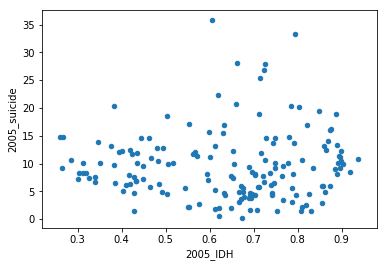

In [101]:
data.plot.scatter(x="2005_IDH", y = "2005_suicide")
data["2005_IDH"].corr(data["2005_suicide"])

0.1079237536219328

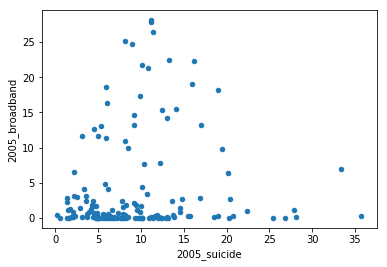

In [102]:
data.plot.scatter(x="2005_suicide", y = "2005_broadband")
data["2005_suicide"].corr(data["2005_broadband"])

0.6520494868925993

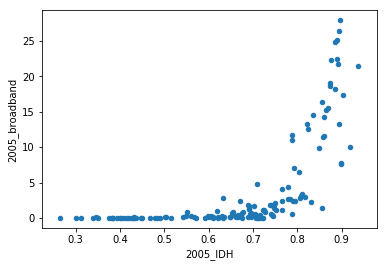

In [103]:
data.plot.scatter(x="2005_IDH", y = "2005_broadband")
data["2005_IDH"].corr(data["2005_broadband"])

## Função da reta sobre dispersão:

In [93]:
def reta(dados_x, dados_y, nome_x, nome_y):    
    a = dados_y.cov(dados_x) / dados_x.var()
    b = dados_y.mean() - a*dados_x.mean()

    fig = plt.figure(figsize=(8, 6))
    plt.scatter(dados_x, dados_y, c='red', alpha=0.8)
    plt.xlabel(nome_x)
    plt.ylabel(nome_y)

    plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color='blue')

    plt.tight_layout()
    plt.show()

## Execução da função:

## IDH por felicidade:

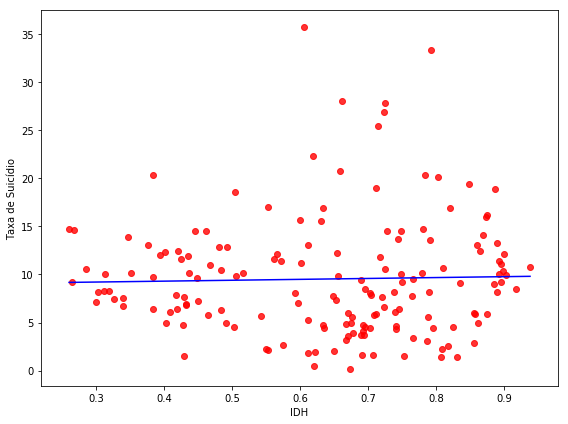

0.026855281236226394

In [106]:
reta(data["2005_IDH"], data["2005_suicide"], "IDH", "Taxa de Suicídio")
data["2005_IDH"].corr(data["2005_suicide"])

A correlação deste gráfico ficou altamente baixa, afirmando pouca relação entre o IDH de uma nação e felicidade

## IDH por Mídia:

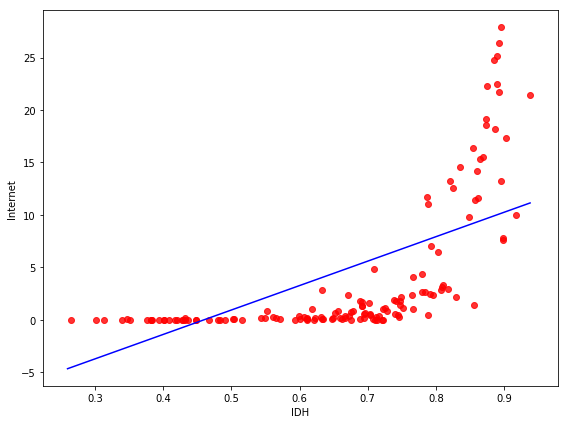

0.6520494868925993

In [96]:
reta(data["2005_IDH"], data["2005_broadband"], "IDH", "Internet")
data["2005_IDH"].corr(data["2005_broadband"])

A correlação não está nem alta nem baixa. Ao analisar o gráfico, é possível apenas confirmar o fato de que quanto melhor desenvolvido um país, mais pessoas tem acesso à internet

## Felicidade por Mídia:

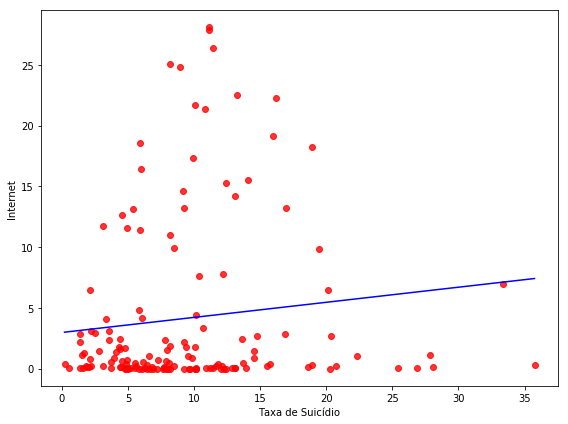

0.1079237536219328

In [95]:
reta(data["2005_suicide"], data["2005_broadband"], "Taxa de Suicídio", "Internet")
data["2005_suicide"].corr(data["2005_broadband"])

Como gráfico principal do projeto, a análise deste responde perfeitamente a pergunta. Ainda que a correlação esteja baixa, o acúmulo de pontos na parte inferior e esquerda do gráfico é claro, demonstrando o exato oposto do esperado, uma situação em que a mídia aumenta a felicidade.

# Conclusão

Ao final do projeto, foi possível obter uma resposta para a pergunta ainda que não a esperada. A mídia influencia positivamente na felicidade de uma população. Futuras iterações do projeto poderiam constar diferenciações entre o tipo de mídia, visto que analisar puramente pela internet pode ser considerado abrangente. Além disto, outras variáveis com o intuito de representar suicídio visto que este é apenas uma representação extrema.

In [108]:
data.to_csv( 'Suicide_broadband.csv', index=True)